In [38]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc  
import matplotlib.pyplot as plt  
import itertools
import seaborn as sns
#import scipy.stats as stats
# 加载数据  
data = pd.read_csv('breast-cancer-wiscons.csv')  
#将diagnosis数据中的M  B转换成 1 0 ，方便后面的数据计算
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0}) 
# 数据y 为diagnosis列数据
y = data.diagnosis    
# 数据X 为去掉 id 和diagnosis两列数据后的数据
list = ['id','diagnosis']
x = data.drop(list,axis = 1 )
#显示X数据 根据运行结果可知 数据中有10列数（10组特征数据）
x.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


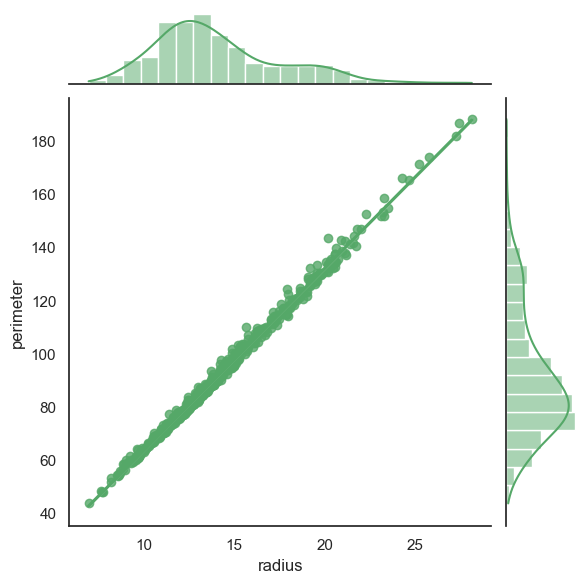

In [39]:
# 使用radius 和 perimeter绘制一张数据图  用于观察和分析数据关系
sns.set(style="white",color_codes=True)
jp=sns.jointplot(x=x.loc[:,'radius'], y=x.loc[:,'perimeter'],  kind="reg", color="g")

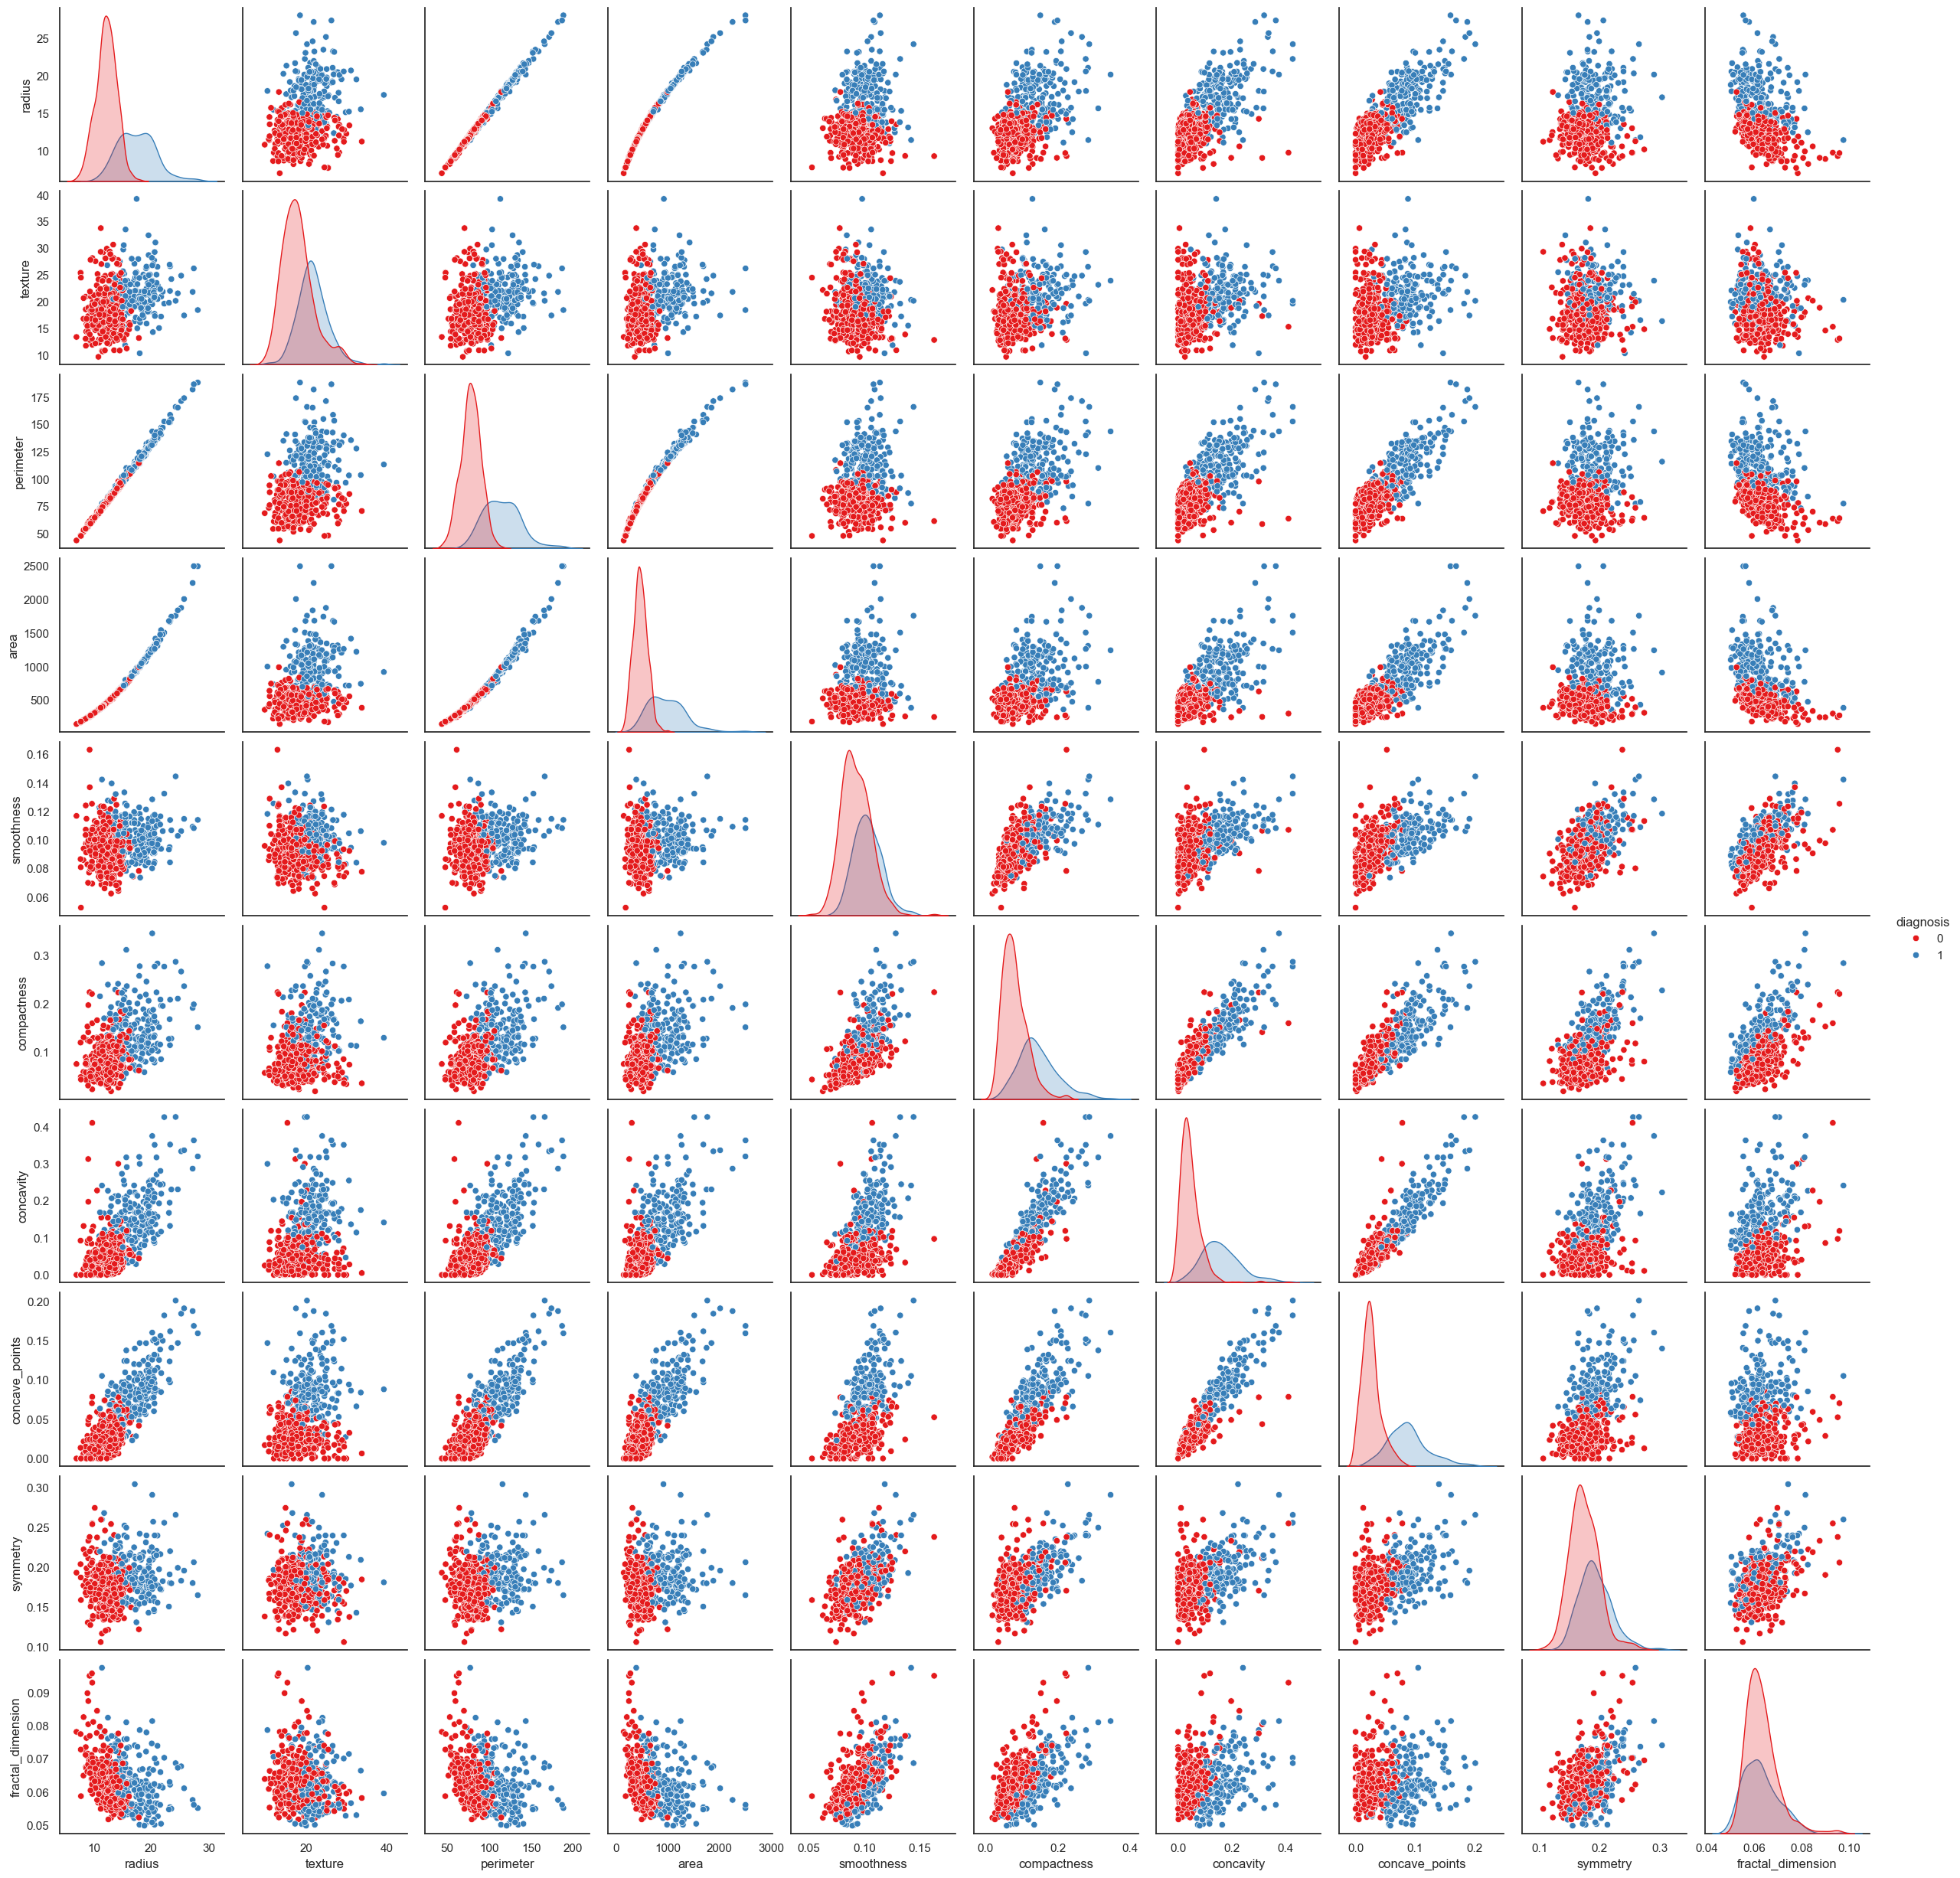

In [40]:
#使用pairplot函数显示X中的10组数组 两两之间的关系
data_show = pd.concat([y,x],axis=1) 
#pairplot用于绘制数据集中所有变量之间关系的函数。当选择两个不同的变量作为X轴和Y轴时，会在图表区域绘制散点图，当选择同一变量（对角线）作为X轴和Y轴时，会在图表区域绘制直方图用于展示单一变量的频率分布。
grid=sns.pairplot(data=data_show,kind ="scatter",hue="diagnosis",palette="Set1",diag_kind = "kde")

In [26]:
# 划分训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  

In [27]:
# 创建逻辑回归模型  
log_reg = LogisticRegression(max_iter=1000)  # 设置max_iter以避免收敛警告   
# 训练模型  
log_reg.fit(X_train, y_train)  
# 预测测试集  
y_pred = log_reg.predict(X_test)  

In [28]:
# 评估模型  
print("Classification Report:")  
print(classification_report(y_test, y_pred))  
  
print("Confusion Matrix:")  
print(confusion_matrix(y_test, y_pred))  

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        71
           1       0.89      0.93      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix:
[[66  5]
 [ 3 40]]


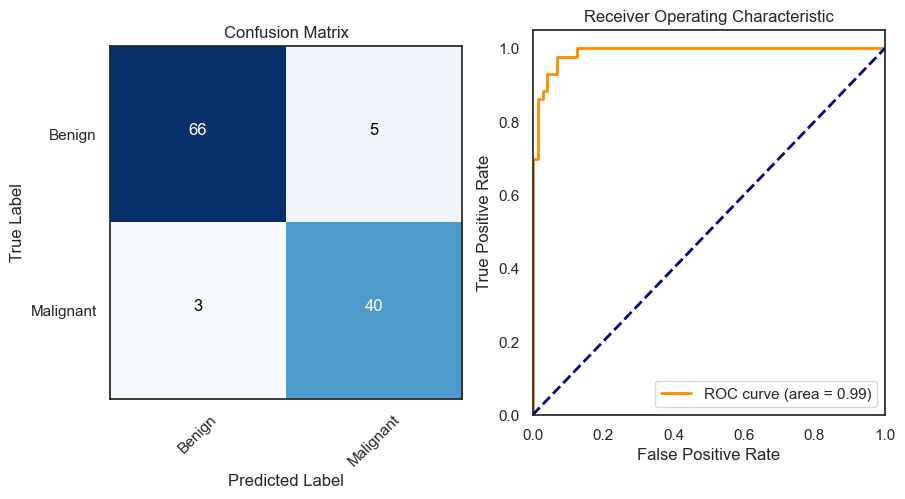

In [30]:
# 可视化混淆矩阵  
plt.figure(figsize=(10, 5))  
plt.subplot(1, 2, 1)  
cm = confusion_matrix(y_test, y_pred)  
plt.imshow(cm, cmap='Blues')  
plt.title('Confusion Matrix')  
plt.xlabel('Predicted Label')  
plt.ylabel('True Label')  
tick_marks = range(2)  
plt.xticks(tick_marks, ['Benign', 'Malignant'], rotation=45)  
plt.yticks(tick_marks, ['Benign', 'Malignant'])  
thresh = cm.max() / 2.  

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):  
    plt.text(j, i, format(cm[i, j], 'd'),  
             horizontalalignment="center",  
             color="white" if cm[i, j] > thresh else "black")  

# 计算ROC曲线的相关指标  
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])  
roc_auc = auc(fpr, tpr)  
# 可视化ROC曲线 
plt.subplot(1, 2, 2)  
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver Operating Characteristic')  
plt.legend(loc="lower right")  
plt.show()